## Health Disease - Classification Project
The dataset is extracted from Kaggle. This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

#### Meaning of column headers:

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Data Pre-processing
There exist no columns with missing data

#### Exploratory Data Analysis
We perform few EDA to understand the behavior of the data

#### Categorical random variable columns 
For the categorical columns, we will be getting 3 plots for each variable: the bar plot of the different levels of the categorical variable, how the target class is varying across each of the levels and finally the odds of having a heart disease with respect to each level of the column.

#### Continuous random variable columns 
For the continuous columns, we will be checking the distribution of the random variable and will also check the mean value of the random variable across the categories of the target variable. In some cases, we will also try to bin the continuous random variable into several categories to transform it into a categorical random variable and carry on with the EDA mention in point 

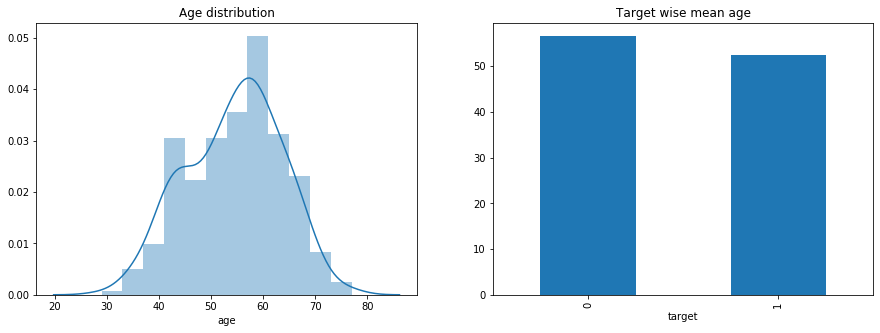

In [5]:
#Age : Continuous RV
fig, axes = plt.subplots(1,2,figsize = (15,5))

#Checking the distribution of this column
sns.distplot(df["age"], ax = axes[0]).set_title("Age distribution")

#Target wise old peak average
df.groupby(by = ["target"])["age"].mean().plot(kind = "bar", ax = axes[1], title="Target wise mean age")

We will now try to bin the age variables to age group baskets of:

Young : (20-40] years
Young2Old : (40-50] years
Old : (50-60] years
Senior : (60-70] years
Fragile : 70+ years

In [6]:
#Creating bins for age
lstBins = [20,40,50,60,70,90]
df["ageGrp"] = pd.cut(df["age"], bins = lstBins, labels = ["Young", "Young2Old", "Old", "Senior", "Fragile"])

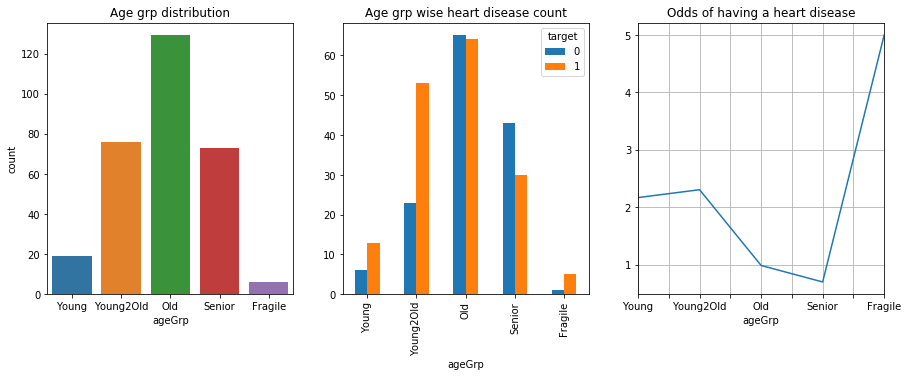

In [7]:
#Age Group: Categorical RV
#Checking the distribution of age grp variable and its impact on heart disease
fig, axes = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x = df["ageGrp"], ax = axes[0]).set_title("Age grp distribution")

#Impact of age group on heart disease
dfTemp = pd.crosstab(df["ageGrp"], df["target"])
dfTemp.plot(kind="bar", ax = axes[1], title="Age grp wise heart disease count");

#Calculating the odds of having heart disease for each age grp type
dfTemp["Odds"] = round(dfTemp[1]/dfTemp[0],3)
dfTemp["Odds"].plot(kind="line", ax = axes[2], title ="Odds of having a heart disease", grid=True)

Text(0.5, 1.0, 'Target(0/1) separation among age groups')

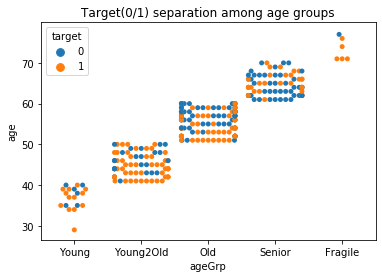

In [8]:
#Check the swarm plot of the age grp variable
sns.swarmplot(x="ageGrp", y="age",hue='target', data=df).set_title("Target(0/1) separation among age groups")

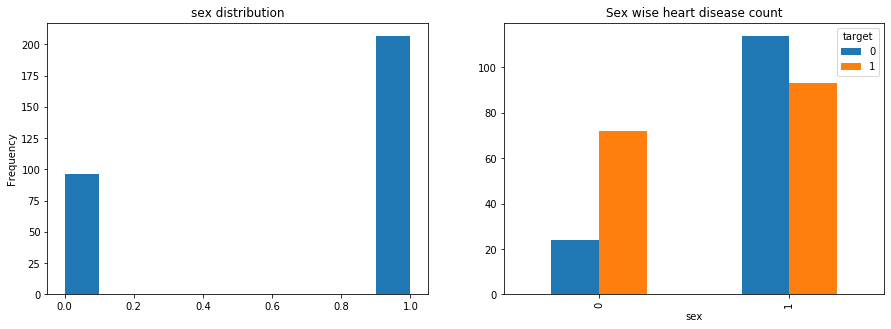

In [9]:
#Sex:Categorical RV
#Checking the distribution of sex variable and its impact on heart disease
fig, axes = plt.subplots(1,2,figsize = (15,5))
df["sex"].plot(kind="hist", ax = axes[0], title="sex distribution");

#Impact of sex on heart disease
dfTemp = pd.crosstab(df["sex"], df["target"])
dfTemp.plot(kind="bar", ax = axes[1], title="Sex wise heart disease count")

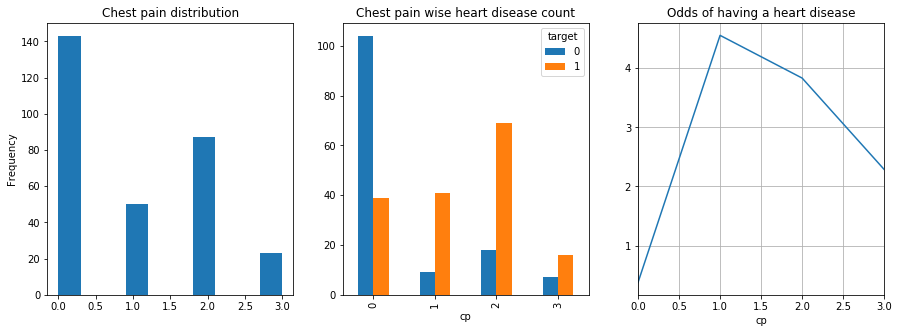

In [10]:
#Chest Pain : Categorical RV
#Checking the distribution of chest pain variable and its impact on heart disease
fig, axes = plt.subplots(1,3,figsize = (15,5))
df["cp"].plot(kind="hist", ax = axes[0], title="Chest pain distribution");

#Impact of chest pain on heart disease
dfTemp = pd.crosstab(df["cp"], df["target"])
dfTemp.plot(kind="bar", ax = axes[1], title="Chest pain wise heart disease count");

#Calculating the odds of having heart disease for each chest pain type
dfTemp["Odds"] = round(dfTemp[1]/dfTemp[0],3)
dfTemp["Odds"].plot(kind="line", ax = axes[2], title ="Odds of having a heart disease", grid=True)

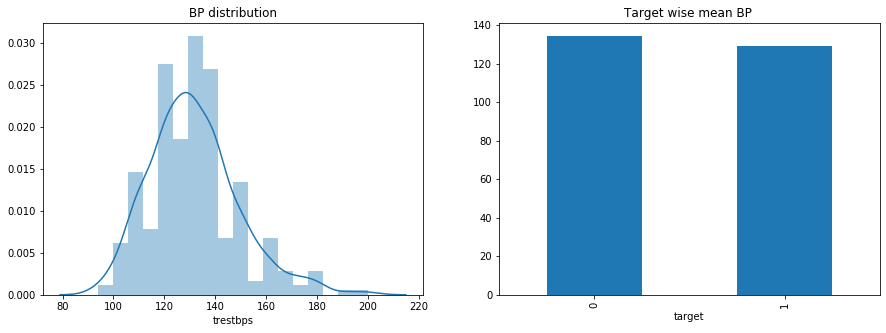

In [11]:
#Resting Blood Pressure : Continuous RV
fig, axes = plt.subplots(1,2,figsize = (15,5))

#Checking the distribution of this column
sns.distplot(df["trestbps"], ax = axes[0]).set_title("BP distribution")

#Target wise old peak average
df.groupby(by = ["target"])["trestbps"].mean().plot(kind = "bar", ax = axes[1], title="Target wise mean BP ")

The above graph does not give out much information and shows that the mean blood pressure among people who have heart disease versus those who do not, is roughly same.

To explore more into this variable, we will be binning the blood pressure into the below categories:

Very low : (70-100]
Low : (100-120]
Normal : (120-140]
High : (140-160]
Very high : (160-220]

In [12]:
#Binning the rest systolic BP
bpCatLst = [70,100,120,140,160,220]
df["bpGrp"] = pd.cut(df["trestbps"], bins = bpCatLst, labels = ["very low", "low", "normal","high","very high"])

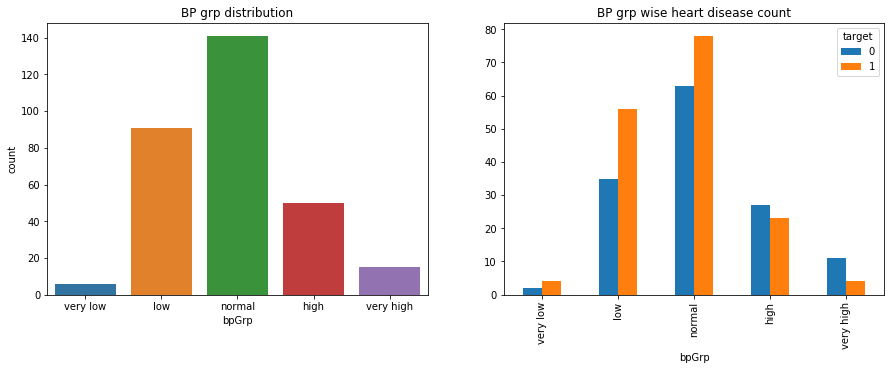

In [13]:
#Checking the distribution of BP grp variable and its impact on heart disease
fig, axes = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x = df["bpGrp"], ax = axes[0]).set_title("BP grp distribution")

#Impact of BP grp on heart disease
dfTemp = pd.crosstab(df["bpGrp"], df["target"])
dfTemp.plot(kind="bar", ax = axes[1], title="BP grp wise heart disease count");


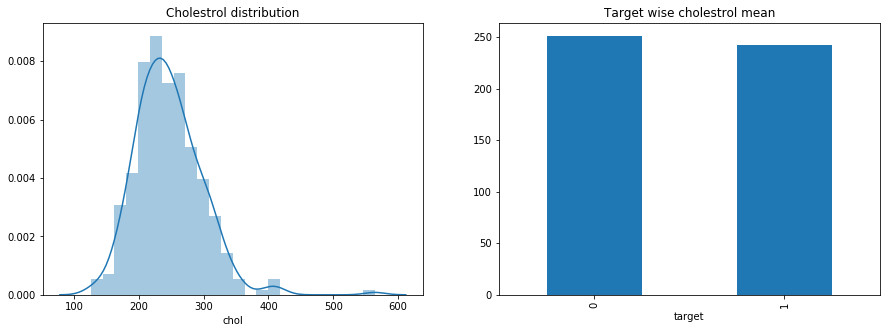

In [14]:
#Cholestrol : Continuous RV
fig, axes = plt.subplots(1,2,figsize = (15,5))

#Checking the distribution of this column
sns.distplot(df["chol"], ax = axes[0]).set_title("Cholestrol distribution")

#Target wise old peak average
df.groupby(by = ["target"])["chol"].mean().plot(kind = "bar", ax = axes[1], title="Target wise cholestrol mean")

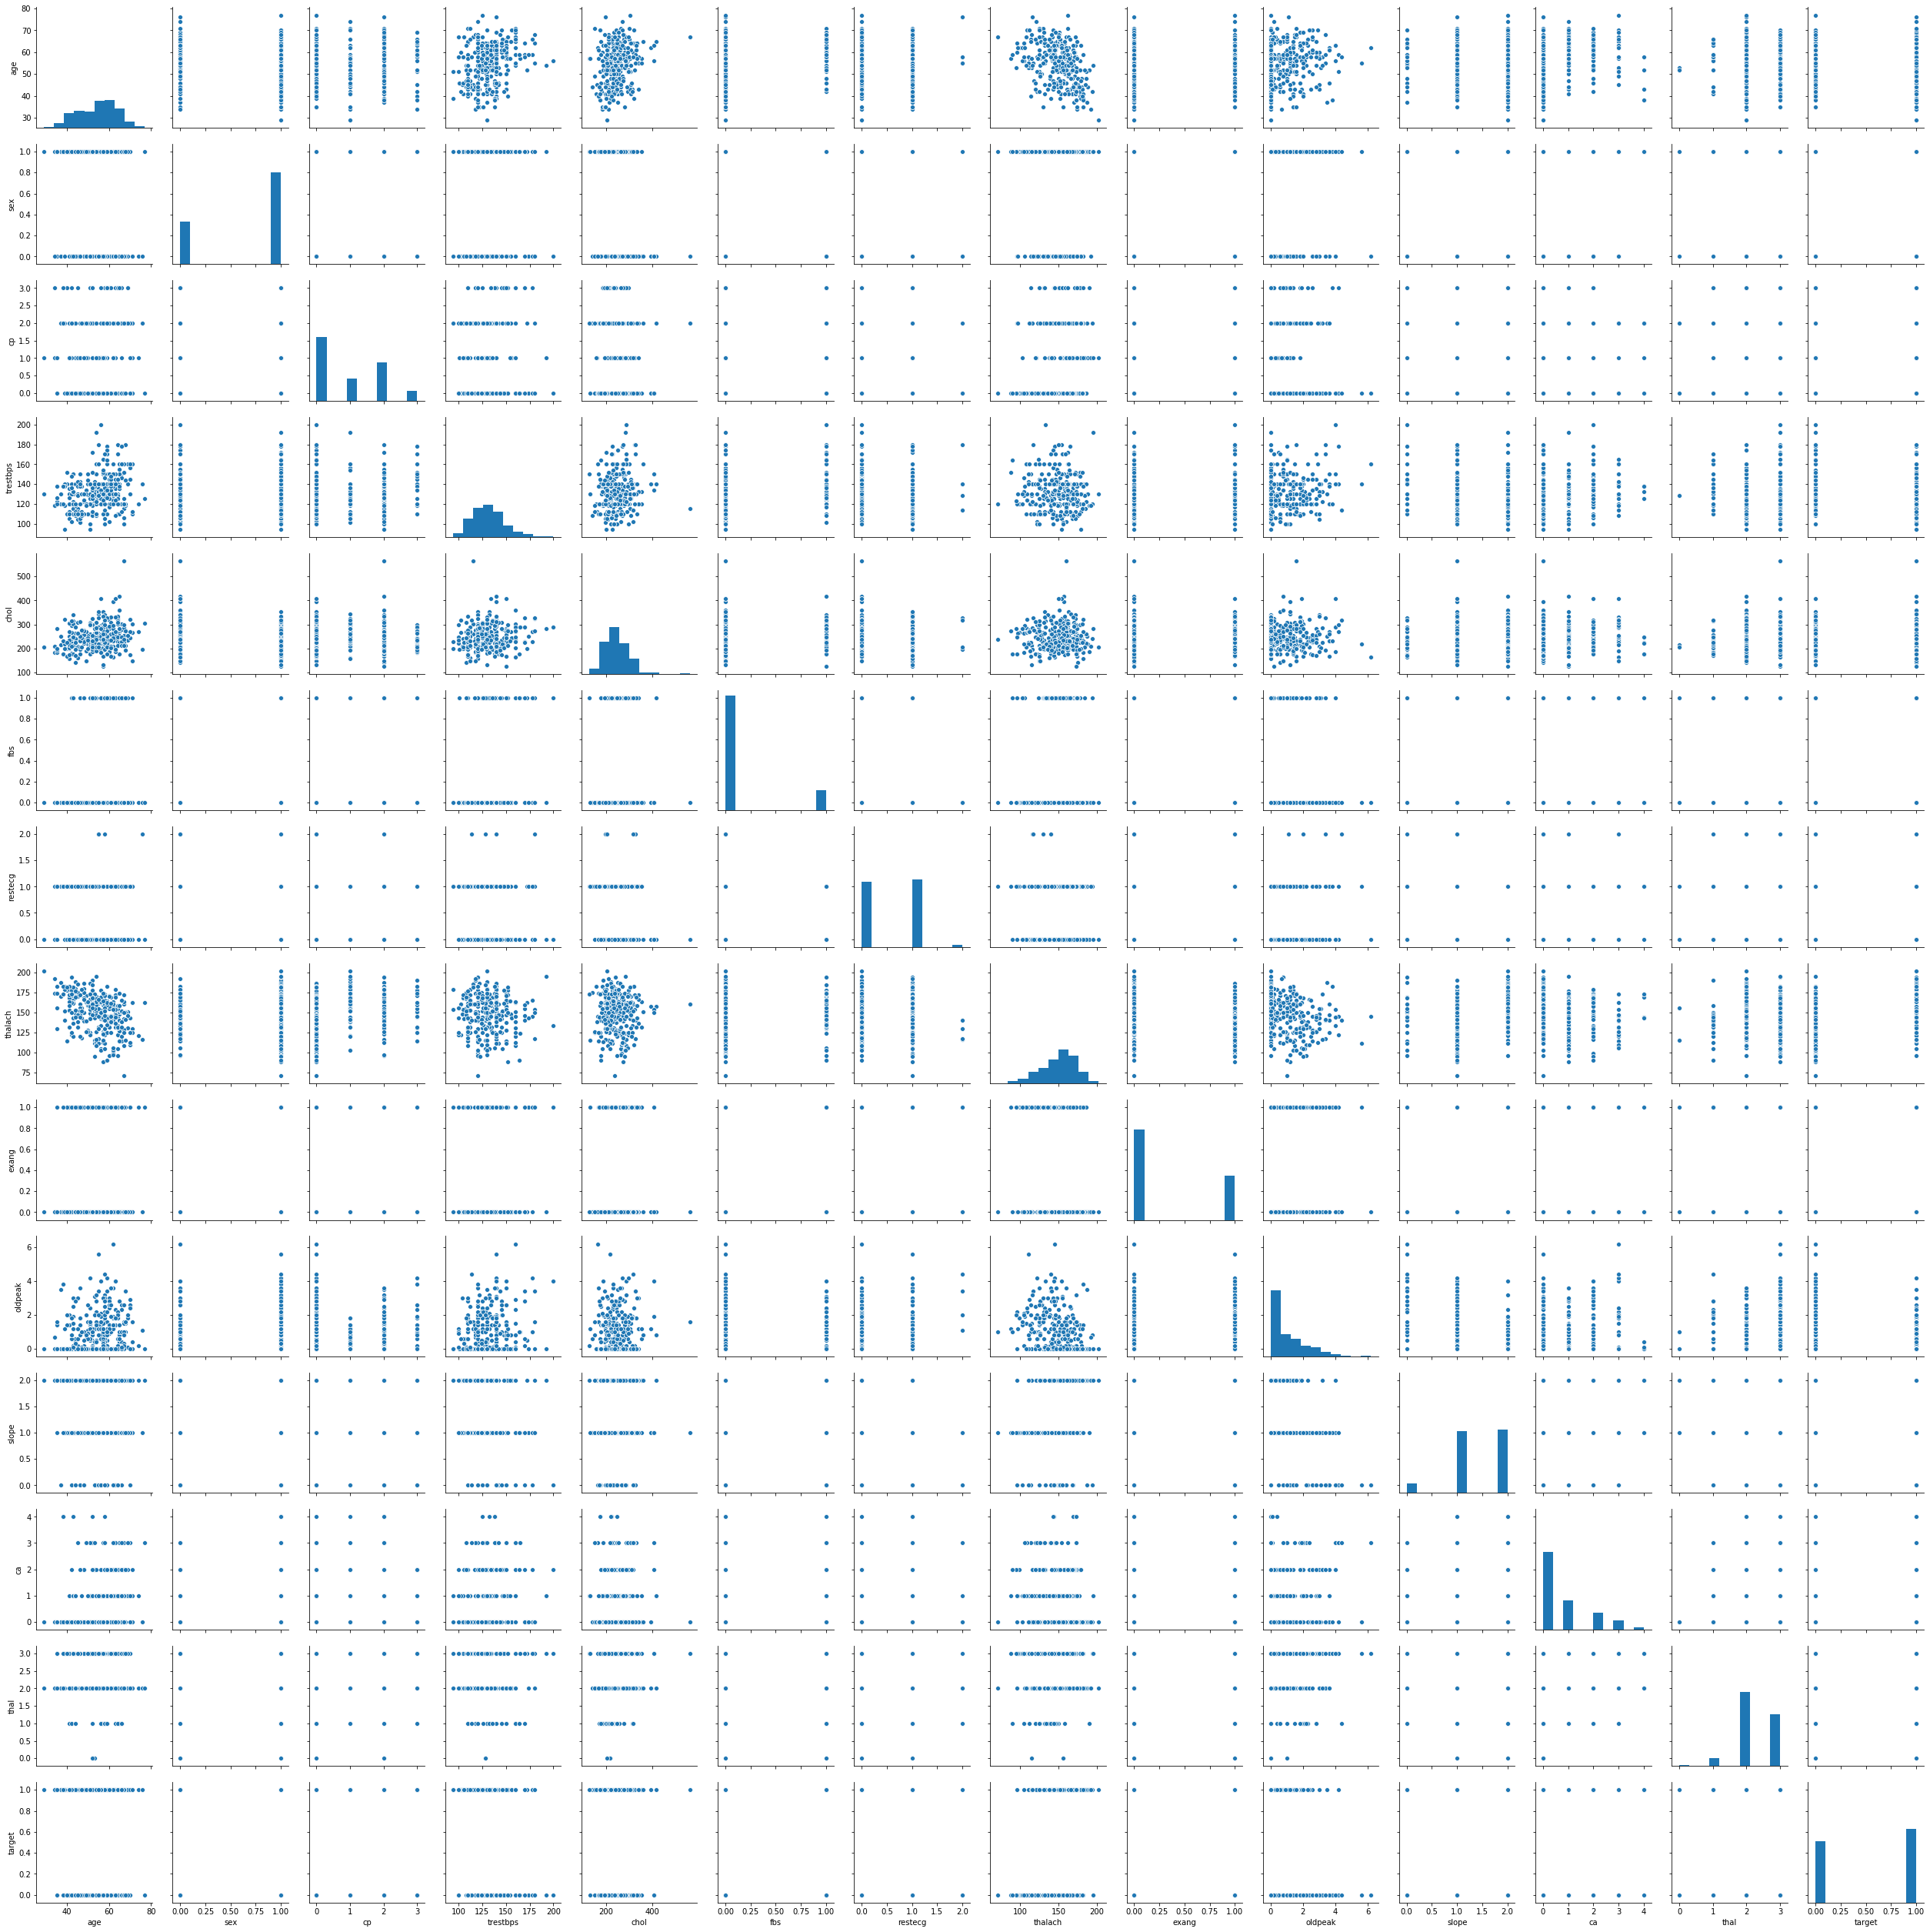

In [15]:
#Pairplot
sns.pairplot(df, diag_kind='hist')

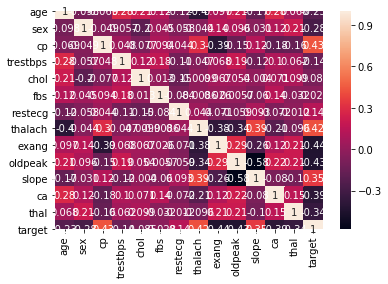

In [16]:
#correlation using heatmap
sns.heatmap(df.corr(),annot=True, cbar=True)

### Feature Selection
https://www.kaggle.com/sz8416/6-ways-for-feature-selection

In [17]:
features = df.drop(['target','ageGrp','bpGrp'],axis=1)
label = df.target
feature_name = features.columns.tolist()

### 1 Filter
documentation for SelectKBest: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
#### 1.1 Pearson Correlation

Normalization: no
<br>Impute missing values: yes

In [18]:
#Pearson Correlation Test
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-13:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [19]:
cor_support, cor_feature = cor_selector(features, label)
print(str(len(cor_feature)), 'selected features')

13 selected features


#### 1.2 Chi-2

Normalization: MinMaxScaler (values should be bigger than 0)
<br>Impute missing values: yes

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
features_norm = MinMaxScaler().fit_transform(features)
chi_selector = SelectKBest(chi2, k=13)
chi_selector.fit(features_norm, label)

SelectKBest(k=13, score_func=<function chi2 at 0x0000023E6D9FAA68>)

In [21]:
chi_support = chi_selector.get_support()
chi_feature = features.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

13 selected features


### 2. Wrapper
documentation for RFE: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

Normalization: depend on the used model; yes for LR
<br>Impute missing values: depend on the used model; yes for LR

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=13)
rfe_selector.fit(features_norm, label)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=13, step=1, verbose=0)

In [23]:
rfe_support = rfe_selector.get_support()
rfe_feature = features.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

13 selected features


### 3. Embeded
documentation for SelectFromModel: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html 

#### 3.2 Random Forest

Normalization: No
<br>Impute missing values: Yes

In [24]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median')
embeded_rf_selector.fit(features, label)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [25]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = features.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

5 selected features


#### 3.3 LightGBM

Normalization: No
<br>Impute missing values: No

In [26]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')
embeded_lgb_selector.fit(features, label)

SelectFromModel(estimator=LGBMClassifier(boosting_type='gbdt',
                                         class_weight=None,
                                         colsample_bytree=0.2,
                                         importance_type='split',
                                         learning_rate=0.05, max_depth=-1,
                                         min_child_samples=20,
                                         min_child_weight=40,
                                         min_split_gain=0.01, n_estimators=500,
                                         n_jobs=-1, num_leaves=32,
                                         objective=None, random_state=None,
                                         reg_alpha=3, reg_lambda=1, silent=True,
                                         subsample=1.0,
                                         subsample_for_bin=200000,
                                         subsample_freq=0),
                max_features=None, norm_order=1, prefit=False

In [27]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = features.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

13 selected features


#### Summary for Feature Selection

In [28]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 13
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(13)

,Feature,Pearson,Chi-2,RFE,Random Forest,LightGBM,Total
1,thalach,True,True,True,True,True,5
2,thal,True,True,True,True,True,5
3,oldpeak,True,True,True,True,True,5
4,cp,True,True,True,True,True,5
5,ca,True,True,True,True,True,5
6,trestbps,True,True,True,False,True,4
7,slope,True,True,True,False,True,4
8,sex,True,True,True,False,True,4
9,restecg,True,True,True,False,True,4
10,fbs,True,True,True,False,True,4


In [29]:
#colnames of features that met the standard of all three selectors.
selected_features_list = feature_selection_df[feature_selection_df.Total >= 1]['Feature'].tolist()
selected_features_list

['thalach',
 'thal',
 'oldpeak',
 'cp',
 'ca',
 'trestbps',
 'slope',
 'sex',
 'restecg',
 'fbs',
 'exang',
 'chol',
 'age']

### Fit the Model

#### Model 1 - Random Forest Classifier

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=0)
modelRFC = RandomForestClassifier(max_depth=5)
modelRFC.fit(x_train,y_train)
print(modelRFC.score(x_train,y_train))
print(modelRFC.score(x_test,y_test))

0.9462809917355371
0.8524590163934426


In [64]:
y_predict = modelRFC.predict(x_test)
y_pred_quant = modelRFC.predict_proba(x_test)[:, 1] #probability for each test data that belongs to class 1

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
confusion_matrix

array([[21,  6],
       [ 3, 31]], dtype=int64)

In [66]:
y_predict

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [67]:
y_pred_quant

array([0.14869897, 0.6112951 , 0.62355733, 0.02665789, 0.24884736,
       0.53198796, 0.17919432, 0.10529197, 0.02923511, 0.05360963,
       0.57960569, 0.87455386, 0.082199  , 0.90315958, 0.92800482,
       0.65743895, 0.26068183, 0.77344754, 0.06229732, 0.67524323,
       0.88717916, 0.43495952, 0.25158077, 0.28671336, 0.8699445 ,
       0.43154372, 0.22125386, 0.49702243, 0.93200276, 0.70374001,
       0.56031412, 0.16312377, 0.93747633, 0.73985818, 0.95450066,
       0.53071586, 0.15926746, 0.89550035, 0.11340893, 0.25419227,
       0.72003826, 0.50329003, 0.80028278, 0.14549162, 0.46029218,
       0.69635142, 0.81392261, 0.5028807 , 0.09596446, 0.7353234 ,
       0.87863025, 0.58814695, 0.92913097, 0.74138295, 0.95640194,
       0.21918414, 0.79986449, 0.77891628, 0.79420539, 0.95179735,
       0.74165098])

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [69]:
from sklearn.metrics import f1_score,precision_score,recall_score,precision_recall_curve
f1 = f1_score(y_test,y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test,y_predict)
print("Precision:",precision,"Recall:",recall,"F-1 Score:",f1)

Precision: 0.8378378378378378 Recall: 0.9117647058823529 F-1 Score: 0.8732394366197184


In [70]:
# calculate precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y_predict)

0.8993914357945215


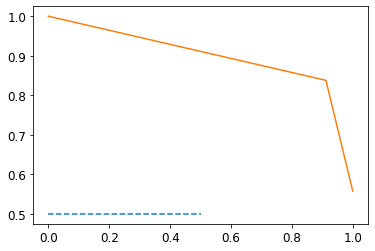

In [71]:
#Plot PR Curve
# calculate precision-recall AUC 
from sklearn.metrics import auc
auc = auc(recall, precision)
plt.figure()
print(auc)
plt.plot([0,0.5],[0.5,0.5],linestyle='--')
plt.plot(recall,precision)

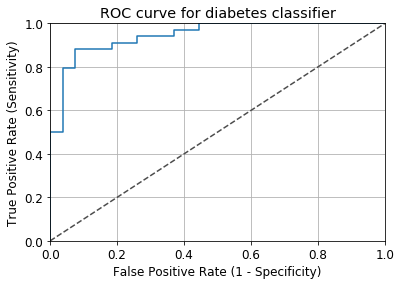

In [72]:
#Plot ROC 
from sklearn.metrics import roc_auc_score,roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [73]:
auc(fpr, tpr)

0.9455337690631808

#### Interpreting the Model
Now let's see what the model gives us from the ML explainability tools.
<br>Permutation importance is the first tool for understanding a machine-learning model, and involves shuffling individual variables in the validation data (after a model has been fit), and seeing the effect on accuracy. Learn more here https://www.kaggle.com/dansbecker/permutation-importance.

In [82]:
import eli5 as eli5

In [83]:
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(modelRFC, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0459 ± 0.0564,thal
0.0459 ± 0.0435,cp
0.0393 ± 0.0334,sex
0.0295 ± 0.0131,chol
0.0164 ± 0.0207,slope
0.0131 ± 0.0669,ca
0.0098 ± 0.0161,restecg
0.0033 ± 0.0245,age
-0.0000 ± 0.0207,fbs
-0.0000 ± 0.0464,oldpeak


The above figure shows the important variable for the target variable.

#### Model 2 - Logistic Regression


In [85]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression()
modelLR.fit(x_train,y_train)
print(modelLR.score(x_train,y_train))
print(modelLR.score(x_test,y_test))

0.8429752066115702
0.8524590163934426


C:\Users\Anjan Karpak\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [86]:
y_predict = modelLR.predict(x_test)
y_pred_quant = modelLR.predict_proba(x_test)[:, 1] 

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
confusion_matrix

array([[22,  5],
       [ 4, 30]], dtype=int64)

In [88]:
y_predict

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [89]:
y_pred_quant

array([0.05212835, 0.82586423, 0.83550044, 0.02245788, 0.09717984,
       0.42790608, 0.04639989, 0.11539181, 0.00521111, 0.00376465,
       0.78888497, 0.9241606 , 0.03239524, 0.85859937, 0.95304594,
       0.68527389, 0.05888257, 0.73795897, 0.00639111, 0.85173116,
       0.83455534, 0.26681098, 0.06664773, 0.10120134, 0.85359895,
       0.41229789, 0.17610438, 0.30660728, 0.9702046 , 0.66232633,
       0.65315793, 0.01391801, 0.95467989, 0.77928527, 0.91686355,
       0.69615712, 0.04278656, 0.83910424, 0.09383206, 0.13235605,
       0.80373559, 0.76855076, 0.36085834, 0.06017838, 0.44637902,
       0.7590195 , 0.79185668, 0.62031176, 0.03968709, 0.80279662,
       0.87329123, 0.56312793, 0.96104394, 0.84928794, 0.99194624,
       0.09237907, 0.92056045, 0.91771887, 0.81547408, 0.94079974,
       0.65572854])

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [91]:
from sklearn.metrics import f1_score,precision_score,recall_score,precision_recall_curve
f1 = f1_score(y_test,y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test,y_predict)
print("Precision:",precision,"Recall:",recall,"F-1 Score:",f1)

Precision: 0.8571428571428571 Recall: 0.8823529411764706 F-1 Score: 0.8695652173913043


In [92]:
# calculate precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y_predict)

0.9025347844055654


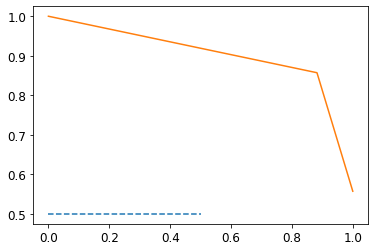

In [93]:
#Plot PR Curve
# calculate precision-recall AUC 
from sklearn.metrics import auc
auc = auc(recall, precision)
plt.figure()
print(auc)
plt.plot([0,0.5],[0.5,0.5],linestyle='--')
plt.plot(recall,precision)

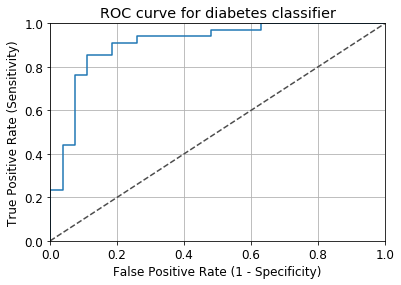

In [94]:
#Plot ROC 
from sklearn.metrics import roc_auc_score,roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [95]:
auc(fpr, tpr)

0.9074074074074073

#### Model 3 - KNN

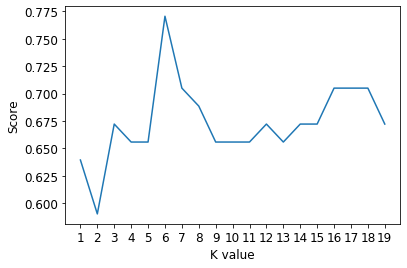

Maximum KNN Score is 77.05%


In [123]:
# try ro find best k value
scoreList = []
x_train,x_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=100)

for i in range(1,20):
    modelKNN = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    modelKNN.fit(x_train, y_train)
    scoreList.append(modelKNN.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

In [124]:
#Create KNN Model
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors=6) #n_neighbors means k
modelKNN.fit(x_train,y_train)
print(modelKNN.score(x_train,y_train))
print(modelKNN.score(x_test,y_test))

0.7355371900826446
0.7704918032786885


In [125]:
y_predict = modelLR.predict(x_test)
y_pred_quant = modelLR.predict_proba(x_test)[:, 1] 

In [126]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
confusion_matrix

array([[27,  6],
       [ 1, 27]], dtype=int64)

In [127]:
y_predict

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [128]:
y_pred_quant

array([0.9466815 , 0.01829281, 0.0130462 , 0.95467989, 0.80279662,
       0.02142407, 0.05888257, 0.12005143, 0.61509679, 0.69246029,
       0.16181854, 0.68263175, 0.10770844, 0.85173116, 0.04639989,
       0.57953293, 0.19111008, 0.066401  , 0.03922611, 0.21397008,
       0.21959777, 0.95808677, 0.121727  , 0.95783009, 0.98634664,
       0.03957681, 0.00376465, 0.83179061, 0.01867672, 0.00458329,
       0.9702046 , 0.99194624, 0.01165747, 0.65315793, 0.06173464,
       0.95304594, 0.32804184, 0.94544256, 0.97906708, 0.85301634,
       0.71936798, 0.05212835, 0.4548281 , 0.87219697, 0.00639111,
       0.92508853, 0.2579961 , 0.87401114, 0.00521111, 0.91485635,
       0.6237545 , 0.69615712, 0.73873358, 0.00909336, 0.91686355,
       0.74431807, 0.73044359, 0.53963754, 0.85375888, 0.88547327,
       0.03577863])

In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61



In [130]:
# calculate precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y_predict)

0.8994304875452418


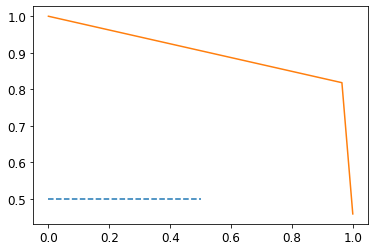

In [131]:
#Plot PR Curve
# calculate precision-recall AUC 
from sklearn.metrics import auc
auc = auc(recall, precision)
plt.figure()
print(auc)
plt.plot([0,0.5],[0.5,0.5],linestyle='--')
plt.plot(recall,precision)

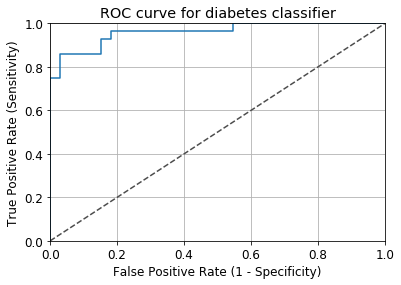

In [132]:
#Plot ROC 
from sklearn.metrics import roc_auc_score,roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [133]:
auc(fpr, tpr)

0.9599567099567099

#### Model 4 - Support Vector Classifier

#### Defining a Cross Validation function

In [189]:
from sklearn.model_selection import cross_val_score
# Using 10 folds cross-validation
def CrossVal(trainX,trainY,model):
    accuracy=cross_val_score(model,trainX , trainY, cv=10, scoring='accuracy')
    return(accuracy)

In [196]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [199]:
modelSVC = SVC(probability=True) #setting it to True to use predict_proba 
modelSVC.fit(x_train,y_train)
probs = modelSVC.predict_proba(x_test)[:,1]

In [211]:
# Run the model on X_test to predict the target labels.Use cross-validation accuracy to check if model overfits or underfits
predict1 = modelSVC.predict(x_test)
modelSVC2=SVC(C=0.2,probability=True,kernel='rbf',gamma='scale')
score=CrossVal(x_train,y_train,modelSVC2)
print("Cross-Validation accuracy is {:.2f}%".format(score.mean()*100))

Cross-Validation accuracy is 82.67%


In [213]:
from sklearn.metrics import accuracy_score
print("Test Accuracy using SVM Model: {:.2f}%".format(accuracy_score(y_test,predict1)))

Test Accuracy using SVM Model: 0.84%


In [201]:
#compare predicted target lables with y_test
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict1)
confusion_matrix

array([[19,  4],
       [ 6, 32]], dtype=int64)

In [202]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        23
           1       0.89      0.84      0.86        38

    accuracy                           0.84        61
   macro avg       0.82      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [203]:
from sklearn.metrics import f1_score,precision_score,recall_score,precision_recall_curve
f1 = f1_score(y_test,predict1)
precision = precision_score(y_test, predict1)
recall = recall_score(y_test,predict1)
print("Precision:",precision,"Recall:",recall,"F-1 Score:",f1)

Precision: 0.8888888888888888 Recall: 0.8421052631578947 F-1 Score: 0.8648648648648649


In [205]:
# calculate precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,predict1)

0.9146774038922443


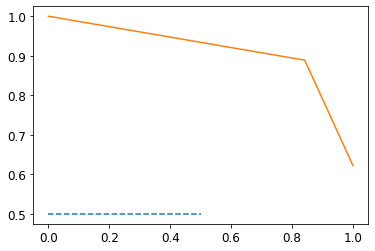

In [206]:
#Plot PR Curve
# calculate precision-recall AUC 
from sklearn.metrics import auc
auc = auc(recall, precision)
plt.figure()
print(auc)
plt.plot([0,0.5],[0.5,0.5],linestyle='--')
plt.plot(recall,precision)

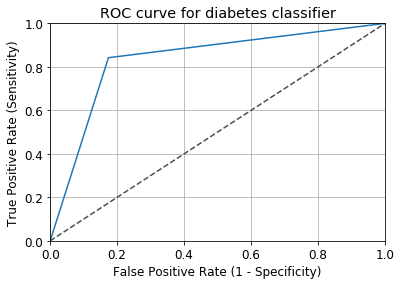

In [207]:
#Plot ROC 
from sklearn.metrics import roc_auc_score,roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test, predict1)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [208]:
auc(fpr, tpr)

0.8340961098398169

### Summary

##### Random Forest Classifier
Test Accuracy: 85.2%
<br>Precision: 83.7%
<br>Recall: 91.1%
<br> F-1 Score: 87.3%
<br> PR-AUC: 89.9%
<br> ROC-AUC: 94.5
##### Logistic Regression
Test Accuracy: 85.2%
<br>Precision: 85.7%
<br>Recall: 88.2%
<br> F-1 Score: 86.9%
<br> PR-AUC: 90.2%
<br> ROC-AUC: 90.7%
##### KNN
Test Accuracy: 77%
<br>Precision: 96%
<br>Recall: 96%
<br> F-1 Score: 89%
<br> PR-AUC: 89.9%
<br> ROC-AUC: 95.9%
##### SVM
Test Accuracy: 84%
<br>Precision: 88.8%
<br>Recall: 84.2%
<br> F-1 Score: 86.4%
<br> PR-AUC: 91.4%
<br> ROC-AUC: 83.4%